In [2]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

from p1stacked import P1Emulator

/contrib2/Tim.Smith/graph-ufs/graphufs/training.py:59: UserWarning: Import failed for either mpi4py or mpi4jax.
  warnings.warn("Import failed for either mpi4py or mpi4jax.")


In [3]:
import graphufs
plt.style.use("graphufs.plotstyle")

In [4]:
%%time
rds = xr.open_zarr(
    "gs://noaa-ufs-gefsv13replay/ufs-hr1/0.25-degree-subsampled/03h-freq/zarr/fv3.zarr",
    storage_options={"token":"anon"},
).rename({
    "pfull": "level",
    "grid_xt": "lon",
    "grid_yt": "lat",
})

CPU times: user 3.88 s, sys: 1.52 s, total: 5.4 s
Wall time: 8.87 s


In [13]:
psl_levels = [50, 100, 150, 200, 250, 300, 400, 500, 600, 700, 850, 925, 1000]
psl_levels = rds.level.sel(level=psl_levels, method="nearest").values

In [17]:
gdm_levels = np.array([
    0.012781458906829357,
    0.048782818019390106,
    0.15953919291496277,
    0.45232152938842773,
    1.124390959739685,
    2.478975772857666,
    4.903191566467285,
    8.800692558288574,
    14.499824523925781,
    22.181779861450195,
    31.871253967285156,
    43.50650405883789,
    57.074893951416016,
    72.7860336303711,
    91.08661651611328,
    112.31695556640625,
    136.75987243652344,
    164.65609741210938,
    196.17715454101562,
    231.39479064941406,
    270.25048828125,
    312.5292053222656,
    357.8437805175781,
    405.63275146484375,
    455.1800537109375,
    505.6520690917969,
    556.1478271484375,
    605.7676391601562,
    653.6714477539062,
    699.1375122070312,
    741.5904541015625,
    780.6387329101562,
    816.0591430664062,
    847.783203125,
    875.869873046875,
    900.4920043945312,
    921.8844604492188,
    940.3500366210938,
    956.1390380859375,
    969.6144409179688,
    981.0247192382812,
    990.6548461914062,
    998.7807006835938,
])

In [18]:
linear_weight = lambda l : l / l.mean()

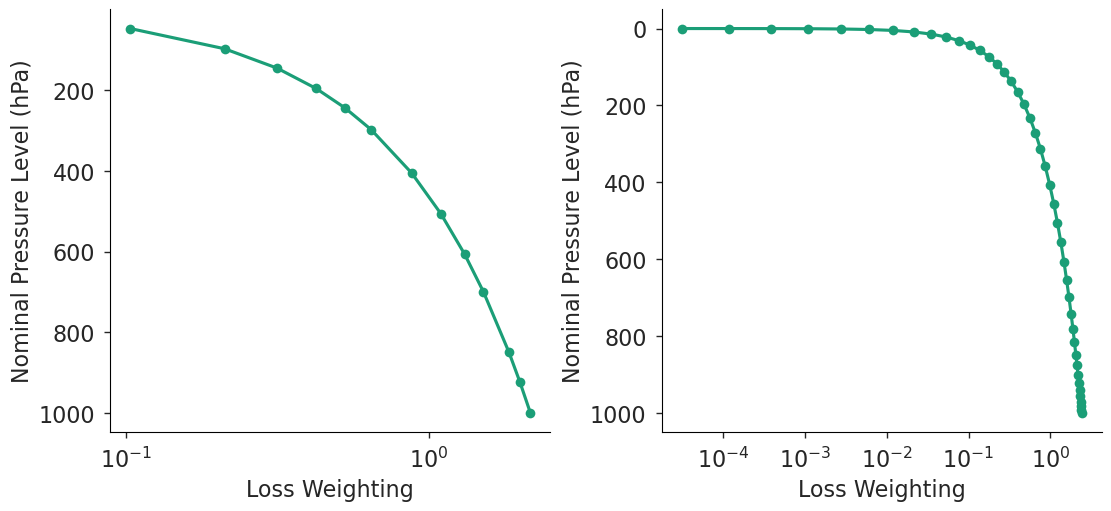

In [32]:
fig, axs = plt.subplots(1,2, figsize=(11,5), constrained_layout=True)

for levels, ax in zip([psl_levels, gdm_levels], axs):
    ax.plot(linear_weight(levels), levels, marker="o")
    ax.set(
        ylim=ax.get_ylim()[::-1],
        xscale="log",
        ylabel="Nominal Pressure Level (hPa)",
        xlabel="Loss Weighting",
    )

In [34]:
from ufs2arco import Layers2Pressure

In [35]:
lp = Layers2Pressure()

In [39]:
lp

In [96]:
phalf = (lp.ak + lp.bk*1000*100)/100
phalf.name = "phalf"
phalf = phalf.to_dataset().set_coords("phalf").swap_dims({"kp1": "phalf"})["phalf"]

In [97]:
phalf

<xarray.DataArray 'phalf' (phalf: 128)> Size: 1kB
array([9.990000e-03, 1.605000e-02, 2.532000e-02, 3.924000e-02, 5.976000e-02,
       8.947000e-02, 1.317700e-01, 1.909600e-01, 2.724300e-01, 3.827600e-01,
       5.298400e-01, 7.229300e-01, 9.726900e-01, 1.291100e+00, 1.691350e+00,
       2.187670e+00, 2.795060e+00, 3.528940e+00, 4.404810e+00, 5.437820e+00,
       6.642360e+00, 8.031640e+00, 9.617340e+00, 1.140931e+01, 1.341538e+01,
       1.564119e+01, 1.809028e+01, 2.076415e+01, 2.366252e+01, 2.678372e+01,
       3.012510e+01, 3.368363e+01, 3.745646e+01, 4.144164e+01, 4.563881e+01,
       5.004995e+01, 5.468017e+01, 5.953848e+01, 6.463864e+01, 7.000000e+01,
       7.564512e+01, 8.158802e+01, 8.783998e+01, 9.441219e+01, 1.013156e+02,
       1.085610e+02, 1.161587e+02, 1.241187e+02, 1.324502e+02, 1.411621e+02,
       1.502622e+02, 1.597575e+02, 1.696539e+02, 1.799563e+02, 1.906681e+02,
       2.017915e+02, 2.133268e+02, 2.252730e+02, 2.376270e+02, 2.503840e+02,
       2.635371e+02, 2.770775e+02, 2.909939e+02, 3.052732e+02, 3.198999e+02,
       3.348564e+02, 3.501229e+02, 3.656774e+02, 3.814962e+02, 3.975533e+02,
       4.138212e+02, 4.302708e+02, 4.468715e+02, 4.635916e+02, 4.803984e+02,
       4.972587e+02, 5.141387e+02, 5.310043e+02, 5.478218e+02, 5.645579e+02,
       5.811795e+02, 5.976550e+02, 6.139536e+02, 6.300459e+02, 6.459040e+02,
       6.615019e+02, 6.768154e+02, 6.918222e+02, 7.065022e+02, 7.208374e+02,
       7.348121e+02, 7.484126e+02, 7.616275e+02, 7.744476e+02, 7.868656e+02,
       7.988764e+02, 8.104768e+02, 8.216651e+02, 8.324418e+02, 8.428087e+02,
       8.527689e+02, 8.623272e+02, 8.714892e+02, 8.802619e+02, 8.886529e+02,
       8.966710e+02, 9.043253e+02, 9.116256e+02, 9.185823e+02, 9.252060e+02,
       9.315078e+02, 9.374988e+02, 9.431902e+02, 9.485933e+02, 9.537195e+02,
       9.585799e+02, 9.631857e+02, 9.675478e+02, 9.716770e+02, 9.755838e+02,
       9.792783e+02, 9.827707e+02, 9.860706e+02, 9.891874e+02, 9.921302e+02,
       9.949077e+02, 9.975282e+02, 1.000000e+03])
Coordinates:
    kp1      (phalf) int64 1kB 0 1 2 3 4 5 6 7 ... 121 122 123 124 125 126 127
  * phalf    (phalf) float64 1kB 0.00999 0.01605 0.02532 ... 994.9 997.5 1e+03

In [163]:
len(phalf.sel(phalf=slice(150, None)))

78

In [168]:
78/4


19.5

In [174]:
rds.level.sel(level=slice(145, 200))

<xarray.DataArray 'level' (level: 6)> Size: 24B
array([145.66469, 154.96143, 164.6561 , 174.75436, 185.26073, 196.17715],
      dtype=float32)
Coordinates:
  * level    (level) float32 24B 145.7 155.0 164.7 174.8 185.3 196.2
Attributes:
    cartesian_axis:  Z
    edges:           phalf
    long_name:       ref full pressure level
    positive:        down
    units:           mb

In [228]:
def get_new_axis(n_skip):
    
    #pisel = phalf.sel(phalf=slice(160, None)).values[::n_skip]
    pisel = phalf.sel(phalf=slice(None, None)).values[::n_skip]
    pfullsel = (pisel[1:] + pisel[:-1])/2
    return pisel, pfullsel

In [229]:
def linvol(p_i):
    if isinstance(p_i, xr.DataArray):
        p_i = p_i.values
    vol = p_i[1:] - p_i[:-1]
    return 1/vol

In [230]:
def linvolmean(p_i):
    if isinstance(p_i, xr.DataArray):
        p_i = p_i.values
    vol = p_i[1:] - p_i[:-1]
    return vol/vol.mean()

In [231]:
def dlogp(p_i):
    if isinstance(p_i, xr.DataArray):
        p_i = p_i.values
    vol = np.log(p_i[1:]) - np.log(p_i[:-1])
    return 1/vol
    

In [239]:
def dlogpmean(p_i):
    if isinstance(p_i, xr.DataArray):
        p_i = p_i.values
    vol = np.log(p_i[1:]) - np.log(p_i[:-1])
    return vol.mean()/vol
    

In [243]:
def dlogptot(p_i):
    if isinstance(p_i, xr.DataArray):
        p_i = p_i.values
    vol = np.log(p_i[1:]) - np.log(p_i[:-1])
    vtot = np.log(p_i[-1]) - np.log(p_i[0])
    return vtot/vol
    

[[<matplotlib.axis.XTick at 0x1553dfbd8310>,

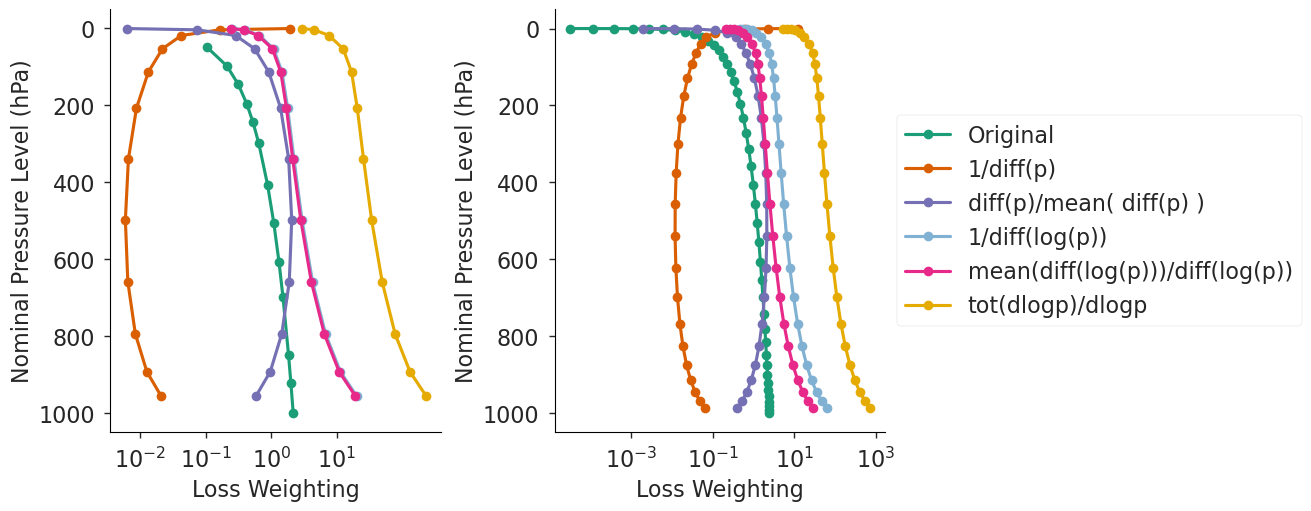

In [245]:
fig, axs = plt.subplots(1,2, figsize=(13,5), constrained_layout=True)

for levels, n_skip, ax in zip([psl_levels, gdm_levels], [10,5], axs):
    ax.plot(linear_weight(levels), levels, marker="o", label="Original")
    newI, newC = get_new_axis(n_skip)
    for w, label in zip(
        [linvol(newI), linvolmean(newI), dlogp(newI), dlogpmean(newI), dlogptot(newI)],
        ["1/diff(p)", "diff(p)/mean( diff(p) )", "1/diff(log(p))", "mean(diff(log(p)))/diff(log(p))", "tot(dlogp)/dlogp"],
    ):
        ax.plot(w, newC, marker="o", label=label)
    ax.set(
        ylim=ax.get_ylim()[::-1],
        xscale="log",
        ylabel="Nominal Pressure Level (hPa)",
        xlabel="Loss Weighting",
    )
ax.legend(bbox_to_anchor=(1.,.5), loc="center left")
axs[0].set(xticks=[.01, .1, 1, 10])

16
[197.46343856 258.13342354 328.33565402 406.27443295 488.93788099
 572.47895914 652.88790612 726.72487508 791.64634292 846.57719495
 891.5574184  927.40789258 955.36901683 976.80923167 993.03531335]
15


In [180]:
volsel = (pisel[1:]-pisel[:-1])/2
wsel = volsel / volsel.mean()

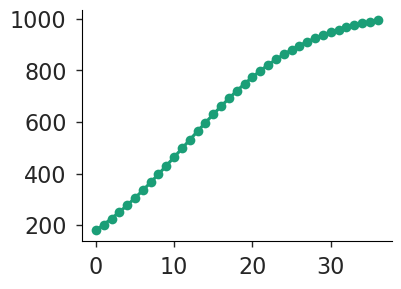

In [181]:
plt.plot(pfullsel, marker='o')

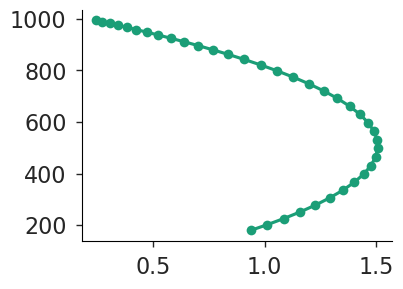

In [183]:
fig, ax = plt.subplots()
ax.plot(wsel, pfullsel, marker='o')
#ax.set(xscale="log")


In [143]:
pfull = (phalf[1:].values+phalf[:-1].values)/2

In [135]:
phalf.rolling?

Signature:
phalf.rolling(
    dim: 'Mapping[Any, int] | None' = None,
    min_periods: 'int | None' = None,
    center: 'bool | Mapping[Any, bool]' = False,
    **window_kwargs: 'int',
) -> 'DataArrayRolling'
Docstring:
Rolling window object for DataArrays.

Parameters
----------
dim : dict, optional
    Mapping from the dimension name to create the rolling iterator
    along (e.g. `time`) to its moving window size.
min_periods : int or None, default: None
    Minimum number of observations in window required to have a value
    (otherwise result is NA). The default, None, is equivalent to
    setting min_periods equal to the size of the window.
center : bool or Mapping to int, default: False
    Set the labels at the center of the window.
**window_kwargs : optional
    The keyword arguments form of ``dim``.
    One of dim or window_kwargs must be provided.

Returns
-------
core.rolling.DataArrayRolling

Examples
--------
Create rolling seasonal average of monthly data e.g. DJF, JFM, .

In [134]:
phalf.isel(phalf=slice(None, None, 5))

<xarray.DataArray 'phalf' (phalf: 26)> Size: 208B
array([9.990000e-03, 8.947000e-02, 5.298400e-01, 2.187670e+00, 6.642360e+00,
       1.564119e+01, 3.012510e+01, 5.004995e+01, 7.564512e+01, 1.085610e+02,
       1.502622e+02, 2.017915e+02, 2.635371e+02, 3.348564e+02, 4.138212e+02,
       4.972587e+02, 5.811795e+02, 6.615019e+02, 7.348121e+02, 7.988764e+02,
       8.527689e+02, 8.966710e+02, 9.315078e+02, 9.585799e+02, 9.792783e+02,
       9.949077e+02])
Coordinates:
    kp1      (phalf) int64 208B 0 5 10 15 20 25 30 ... 100 105 110 115 120 125
  * phalf    (phalf) float64 208B 0.00999 0.08947 0.5298 ... 958.6 979.3 994.9

In [98]:
(psl_levels[:-1] + psl_levels[1:])/2

array([ 72.81688, 121.74397, 170.92093, 220.0635 , 271.01337, 351.8548 ,
       455.6424 , 555.70984, 652.4526 , 773.4603 , 884.83386, 960.3326 ],
      dtype=float32)

In [99]:
pmid = list((psl_levels[:-1] + psl_levels[1:])/2)

In [100]:
interfaces = [phalf.values[0]]+pmid+[phalf.values[-1]]

In [101]:
interfaces

[0.009990000128746034,
 72.81688,
 121.74397,
 170.92093,
 220.0635,
 271.01337,
 351.8548,
 455.6424,
 555.70984,
 652.4526,
 773.4603,
 884.83386,
 960.3326,
 1000.0]

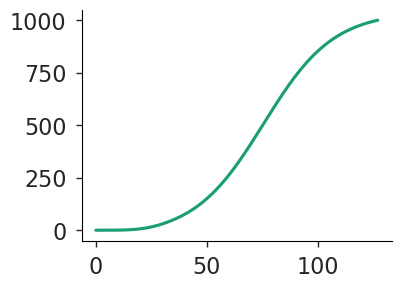

In [105]:
plt.plot(phalf.values)

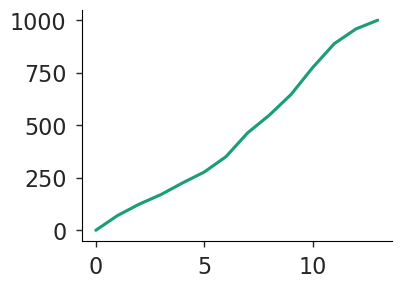

In [111]:
psl_i = phalf.sel(phalf=interfaces, method="nearest")
plt.plot(psl_i)

In [113]:
centers = (psl_i[1:].values + psl_i[:-1].values)/2

In [131]:
volume = psl_i[1:].values - psl_i[:-1].values

weights = volume/volume.mean()
print(weights)

[0.90987922 0.7035497  0.59196424 0.72305464 0.67346539 0.94959977
 1.47510788 1.09500428 1.27508098 1.67108331 1.48468436 0.90905967
 0.53846656]


<BarContainer object of 13 artists>

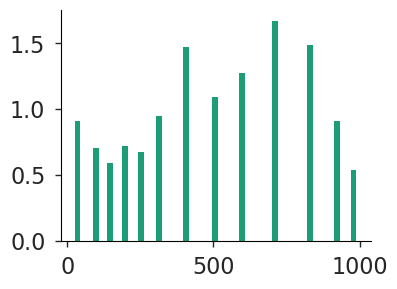

In [132]:
plt.bar(x=centers, height=weights, width=20)

In [24]:
ax.hist(linear_weight(psl_levels))

(array([2., 2., 2., 1., 1., 1., 1., 0., 1., 2.]),
 array([0.10334584, 0.30890495, 0.51446402, 0.7200231 , 0.92558217,
        1.1311413 , 1.33670044, 1.54225945, 1.74781859, 1.9533776 ,
        2.15893674]),
 <BarContainer object of 10 artists>)

In [10]:
pcenter

array([ 47.810493,  97.823265, 145.66469 , 196.17715 , 243.94986 ,
       298.07684 , 405.63275 , 505.65207 , 605.76764 , 699.1375  ,
       847.7832  , 921.88446 , 998.7807  ], dtype=float32)

In [ ]:
vweights = 

In [20]:
ds.pfull.values

array([1.27814589e-02, 2.03340407e-02, 3.17734182e-02, 4.87828180e-02,
       7.36185312e-02, 1.09258682e-01, 1.59539193e-01, 2.29287744e-01,
       3.24474752e-01, 4.52321529e-01, 6.21393025e-01, 8.41642559e-01,
       1.12439096e+00, 1.48222911e+00, 1.92887914e+00, 2.47897577e+00,
       3.14775515e+00, 3.95070624e+00, 4.90319157e+00, 6.02001858e+00,
       7.31502390e+00, 8.80069256e+00, 1.04878244e+01, 1.23852787e+01,
       1.44998245e+01, 1.68360519e+01, 1.93965092e+01, 2.21817799e+01,
       2.51908989e+01, 2.84216900e+01, 3.18712540e+01, 3.55366707e+01,
       3.94154739e+01, 4.35065041e+01, 4.78104935e+01, 5.23309555e+01,
       5.70748940e+01, 6.20536003e+01, 6.72837219e+01, 7.27860336e+01,
       7.85790634e+01, 8.46754990e+01, 9.10866165e+01, 9.78232651e+01,
       1.04896645e+02, 1.12316956e+02, 1.20094673e+02, 1.28239365e+02,
       1.36759872e+02, 1.45664688e+02, 1.54961426e+02, 1.64656097e+02,
       1.74754364e+02, 1.85260727e+02, 1.96177155e+02, 2.07505508e+02,
      

In [42]:
inner = pcenter[:-1] + np.exp(np.diff(np.log(pcenter))/2)
left = 0.001
right = 1000

In [43]:
pint = np.concatenate([[left], inner, [right]])

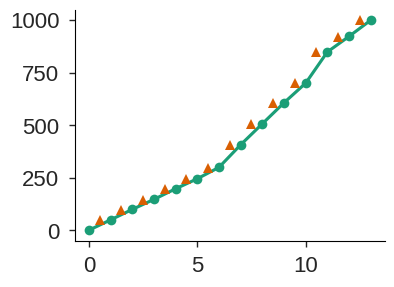

In [44]:
plt.plot(pint, marker='o')
plt.plot(np.arange(13)+.5, pcenter, marker="^", ls='')

In [11]:
pcenter.diff("pfull", ) + p

<xarray.DataArray 'pfull' (pfull: 12)> Size: 48B
array([ 50.01277 ,  47.841423,  50.512466,  47.772705,  54.126984,
       107.55591 , 100.01932 , 100.11557 ,  93.36987 , 148.64569 ,
        74.10126 ,  76.89624 ], dtype=float32)
Coordinates:
  * pfull    (pfull) float32 48B 97.82 145.7 196.2 243.9 ... 847.8 921.9 998.8